# Intro

In this post, I will talk about one of unsupervised learning techniques called K-Means Clustering. It is easy to understand and implement from the scratch.


As this technique is unsupervised, we don't get input with any particular labels. So when we use this technique, all we do is group them into $k$ groups and when data for prediction is given, we output which group it belongs to. We can use this in multiple situations. For example, we are given locations of retail shops that we send our supplies to and we would like to know where we should build our storage units for those supplies. If we are only planning to have one mega-size storage, we could put one in the center of those shops. We can choose any number of storage units ($k$) and decide which location would be ideal to build those for better, faster and easier access and deliveries. 

Below is an animation showing simple K-Means clustering and how it works.

![K-Means Animation](anim.gif)

### Load libraries 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The function in numpy <code>np.random.normal(loc, scale, size)</code> creates randomly generated data points centered at the parameter <code>loc</code>. <code>Scale</code> indicates how much these generated numbers will be spread out from the center. The <code>size</code> is the number of data points to be created.<br>For our problem, let us create two variables for our whole data set. To plot and see the points, <code>x</code> and <code>y</code> should have the same size.

In [2]:
size = 200
x = np.random.normal(0, 2, size)
y = np.random.normal(-0.5, 3, size)

And if we plot them, it will look like the following.

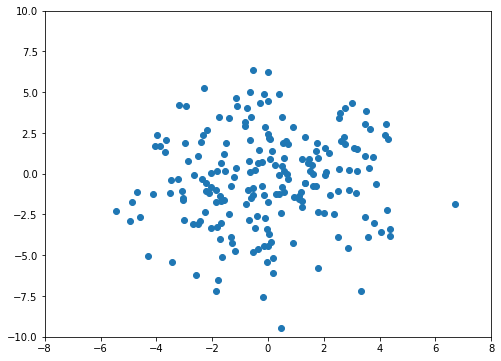

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.xlim(-8, 8)
plt.ylim(-10, 10);

# Implementation

### Function Definitions

Below are the functions necessary to implement K-Means clustering and I've commented its usage so that you can understand what it is doing. Even without those comments, it is pretty easy and clear to grasp what each of it does.

In [4]:
def get_distance(p1, p2):
    """
    input : two coordinates of two positions
    output : euclidean distance between two points.
    """
    z = np.array(p1)-np.array(p2)
    return np.sqrt(np.dot(z, z))


def k_points(n):
    """
    input : n is the number of groups
    output : a list of randomly generated position of each group.
    
    points indicates current data points that belongs to each group.
    curr indicates the current position and prev is previous.
    """
    return [{'prev':None, 'curr':(np.random.randint(-4, 4, 1)[0],np.random.randint(-4, 4, 1)[0]), 'points':[]} for _ in range(n)]


def update_position():
    """
    output : a dictionary of each k points with data points.
    
    Set each group's new position to the center (or the mean) of points that it has currently.
    After that, reset points since previous and current points don't depend on each other.
    """
    dat = {}
    for i, point in enumerate(p):
        point['prev'] = point['curr']
        point['curr'] = np.mean(point['points'], axis=0) if len(point['points']) > 0 else point['prev']
        dat[i] = np.array(point['points'])
        point['points'] = []
    return dat
def done_moving():
    """
    output : boolean
    
    Check if it needs another iteration.
    It will return false if even one of k points have different prev and curr.
    """
    for point in p:
        if np.any(point['curr'] != point['prev']):
            return False
    return True


def assign_points(x, y):
    """
    input : data points for training
    
    Compute each distance between k points and given x1, y1 coordinate and assign it to the closest point.
    """
    for x1, y1 in zip(x, y):
        
        dist = [get_distance(point['curr'], [x1,y1]) for point in p]
        
        # Get the closest kth point from current x,y
        closest_point = dist.index(min(dist))
        p[closest_point]['points'].append([x1,y1])
    


For this exercise, I am using 2D examples so if it in different dimension, <code>assign_points</code> should be modified that it takes more arguments. It is also possible to dynamically take in different number of arguments and feel free to do so.

### Application with 5 points

Now let's create five points and plot with earlier x and y values and see the first graph.

In [12]:
p = k_points(5)

In [6]:
colors = ['red', 'blue', 'green', 'black', 'yellow']

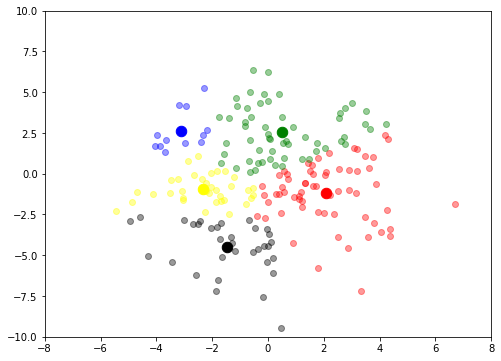

In [13]:
plt.figure(figsize=(8,6))
plt.xlim(-8, 8)
plt.ylim(-10, 10)

assign_points(x, y)
points = update_position()

for i in range(len(p)):
    plt.scatter(p[i]['curr'][0], p[i]['curr'][1], s=110, c=colors[i])
    
    # It is possible that in certain cases, ith group in k doesn't have any points that slicing points[i] can output
    # index error. So only scatter if it has 1 or more pairs of points.
    if len(points[i]) > 0:
        plt.scatter(points[i][:,0], points[i][:,1], c=colors[i], alpha=0.4)
        

Most likely this and your graph looks differ as the data is generated randomly. Also I made data points to be a bit transparent so it is easier to distinguish them from 5 group points and each color corresponds to each colored group.

Now that we've implemented our data points and $k$ points, let's loop them until it converges. Note that the code below is longer than it is necessary because of the visualization. If you don't need any kind of plots, you can use the commented codes.

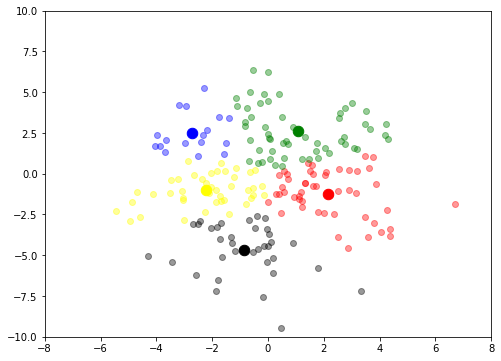

Done at 14th iteration


In [14]:
i = 1
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xlim(-8, 8)
ax.set_ylim(-10, 10)

while not done_moving():
        
    assign_points(x, y)
    points = update_position()

    for j in range(len(p)):
        ax.scatter(p[j]['curr'][0], p[j]['curr'][1], s=110, c=colors[j])
        if len(points[j]) > 0:
            ax.scatter(points[j][:,0], points[j][:,1], c=colors[j], alpha=0.4)
        
    i += 1
    plt.pause(0.8)
    # this clears out the previous plot
    ax.cla()
print("Done at {}th iteration".format(i))

# Uncomment this for no visualization
# i = 1

# while not done_moving():
        
#     assign_points(x, y)
#     update_position()
#     i += 1

# print("Done at {}th iteration".format(i))

Now that we've trained a model, let's test with five randomly generated data points and predict each of its class (0 to 4).

In [9]:
test_x = np.random.normal(0, 2, 5)
test_y = np.random.normal(-0.5, 3, 5)

In [10]:
def predict_class(test_x, test_y):
    
    assign_points(test_x, test_y)
    
    for i, point in enumerate(p):
        for dat in point['points']:
            print('Data point at {} belongs in class {}'.format(dat,i))
        point['points'] = []

In [11]:
predict_class(test_x, test_y)

Data point at [-3.0392765849837944, 5.1916595680342725] belongs in class 0
Data point at [2.7373854043368717, 5.0552030451648395] belongs in class 1
Data point at [1.783583009342738, -1.0744576081808348] belongs in class 2
Data point at [1.3689416852934952, -2.13615385922693] belongs in class 2
Data point at [1.9153785763496811, -2.710038119013541] belongs in class 2


It works! You should note that depending on where these $k$ points are generated, the final graph can be different from each other. Let's look at one simple example next.

![figure a](diff.png)

As we can see two different plots above, we have two data points at (-1,0) and (1,0). But while in the left plot each point belongs to each different group, in the right we can see that two points belong to orange group and the green has no data points. 

Just like the example, though the data points are same it does not mean nor guarantee that the final results of two different plots will end up in the same and so how those $k$ points initialize can greatly impact the outcome so keep in mind.

# End Note

The codes above can all be further improved for either better efficiency and optimization or for visualizations but as this post is not about that, I will leave it as is. 

Thank you for reading the post and please let me know if you find any error.